<h2>Import Libaries</h2>

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

In [3]:
data = pd.read_csv("D:/Machine learning project/Spam detection/data/spam.csv", encoding='latin1')
data.shape

(5572, 5)

<h2>Data preprocessing and Cleaning</h2>

In [4]:
#drop duplicate 
print(f"The number duplicate rows: {data.duplicated().sum()}")

The number duplicate rows: 403


In [5]:
df = data.drop_duplicates()

In [6]:
df = df.drop(df[['Unnamed: 2','Unnamed: 3', 'Unnamed: 4']], axis= 1)

In [7]:
#change columns name
df.columns = ["Label", "Feature"]
df.head()

,Label,Feature
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Label encoder
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label']) #spam - 1 and ham - 0


In [9]:
df.head()

,Label,Feature
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<h2>Visualization</h2>

C:\Users\aajay\AppData\Local\Temp\ipykernel_3916\476623379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x = 'Label', palette='viridis')


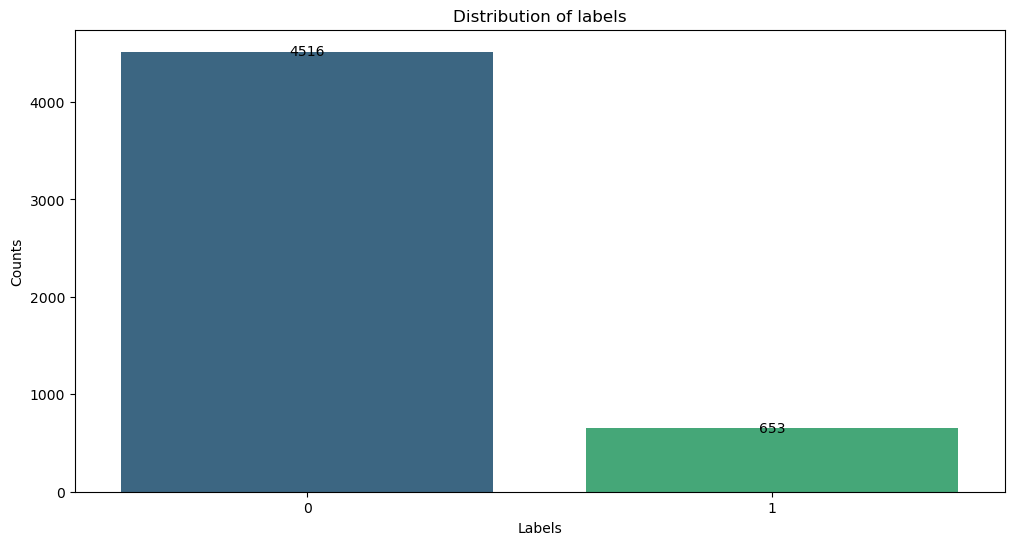

In [10]:
#counplot for spam and ham message
label_counts = df['Label'].value_counts()

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x = 'Label', palette='viridis')
plt.xlabel("Labels")
plt.ylabel("Counts")
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_x() + width/2., p.get_height() + 0.1, 
             int(p.get_height()), ha="center", va="center")
plt.title("Distribution of labels")
plt.show()

<h2>TfidfVectorizer</h2>

In [11]:
#Vectorize the words
Vectorize = TfidfVectorizer()
X = Vectorize.fit_transform(df['Feature'])
y = df['Label']

<h2>Model Deployement</h2>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
#different classification model
model_svc = SVC()
model_lr = LogisticRegression()
model_nv =MultinomialNB()


In [14]:
model_svc.fit(X_train, y_train)


SVC()

In [15]:
model_lr.fit(X_train, y_train)


LogisticRegression()

In [16]:
model_nv.fit(X_train, y_train)

MultinomialNB()

In [17]:
y_pred_svc =model_svc.predict(X_test)
y_pred_lr =model_lr.predict(X_test)
y_pred_nv =model_nv.predict(X_test)


<h2>Model Accuracy comparison</h2>

In [18]:
F1_score_svc = f1_score(y_pred_svc, y_test)
F1_score_lr = f1_score(y_pred_lr, y_test)
F1_score_nv = f1_score(y_pred_nv, y_test)

In [20]:
print(f"The model accuracy is {round(F1_score_svc*100,2)*100}")
print(f"The model accuracy is {round(F1_score_lr*100,2)*100}")
print(f"The model accuracy is {round(F1_score_nv*100, 2)*100}")

The model accuracy is 92.0
The model accuracy is 82.0
The model accuracy is 81.0


C:\Users\aajay\AppData\Local\Temp\ipykernel_9636\1023925962.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_f1_scores, x='Model', y='F1 Score', palette='viridis')


(0.0, 1.0)

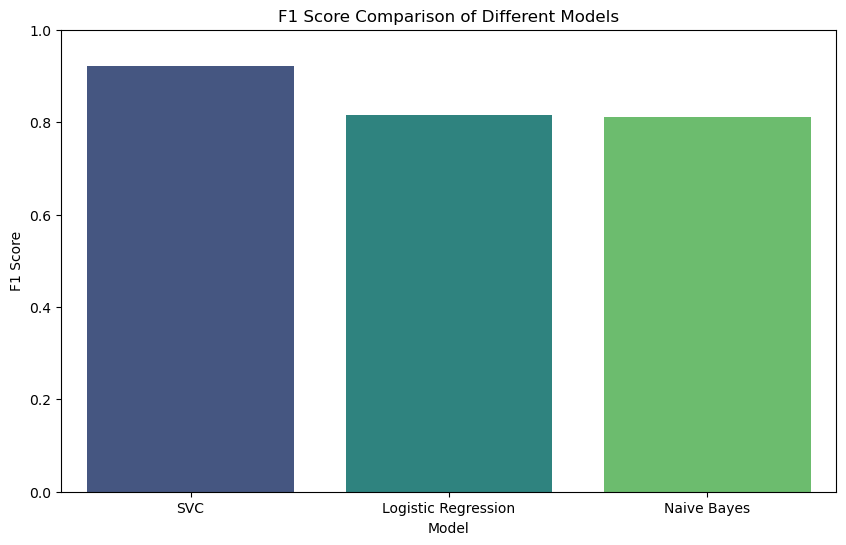

In [43]:
#compare the results
f1_scores = {
    'SVC': F1_score_svc,
    'Logistic Regression': F1_score_lr,
    'Naive Bayes': F1_score_nv
}

# Convert F1 scores to a DataFrame
df_f1_scores = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])

# Plot F1 scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_f1_scores, x='Model', y='F1 Score', palette='viridis')
plt.title('F1 Score Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1) 